<a href="https://colab.research.google.com/github/JackPerry0/Neural-Networks/blob/main/Maximizing_Generalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary:

The purpose of a machine learning model is ot generalize to perform accurately on never-before-seen inputs.

How? *interpolate* between training samples.

Fundamental problem: optimization vs. generalization

* Get more training data, or better training data.
* Develop better features.
* Reduce the capacity of the model
* Add weight regularization (for smaller models).
* Add dropout.

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis = 1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis = 1)


White Noise vs. Zero Noise

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss = "sparse_categorical_crossentropy",
                metrics = ["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 14s 35ms/step - loss: 0.6116 - accuracy: 0.8139 - val_loss: 0.3145 - val_accuracy: 0.8997
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2482 - accuracy: 0.9221 - val_loss: 0.1978 - val_accuracy: 0.9397
Epoch 3/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1612 - accuracy: 0.9493 - val_loss: 0.1586 - val_accuracy: 0.9512
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1142 - accuracy: 0.9646 - val_loss: 0.1392 - val_accuracy: 0.9576
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0838 - accuracy: 0.9740 - val_loss: 0.1507 - val_accuracy: 0.9547
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.1184 - val_accuracy: 0.9663
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.1244 - val_accuracy: 0.96

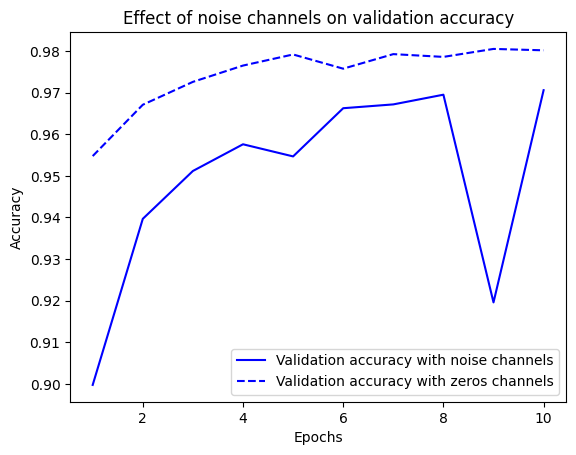

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3134 - accuracy: 0.1076 - val_loss: 2.3038 - val_accuracy: 0.1043
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2991 - accuracy: 0.1170 - val_loss: 2.3107 - val_accuracy: 0.1028
Epoch 3/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2912 - accuracy: 0.1273 - val_loss: 2.3181 - val_accuracy: 0.1016
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2790 - accuracy: 0.1373 - val_loss: 2.3266 - val_accuracy: 0.1050
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2637 - accuracy: 0.1508 - val_loss: 2.3334 - val_accuracy: 0.1034
Epoch 6/100
375/375 [==============================] - 6s 16ms/step - loss: 2.2444 - accuracy: 0.1641 - val_loss: 2.3467 - val_accuracy: 0.1015
Epoch 7/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2202 - accuracy: 0.1784 - val_loss: 2.3586 - val_accuracy: 0

Changing Memorization Capacity (high vs low capacity).

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0)
#lower capacity
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#higher capicty

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)



17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
49/49 [==============================] - 2s 27ms/step - loss: 0.4909 - accuracy: 0.8133
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2961 - accuracy: 0.8990
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2313 - accuracy: 0.9173
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1962 - accuracy: 0.9310
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1726 - accuracy: 0.9391
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1573 - accuracy: 0.9438
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1413 - accuracy: 0.9502
Epoch 8/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1294 - accuracy: 0.9557
Epoch 9/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1192 - accuracy: 0.9601
Epoch 10/20
49/49 [=========================

Regularization Implementation

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.6033 - accuracy: 0.7775 - val_loss: 0.4702 - val_accuracy: 0.8709
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4057 - accuracy: 0.8895 - val_loss: 0.4361 - val_accuracy: 0.8534
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3380 - accuracy: 0.9117 - val_loss: 0.3741 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3015 - accuracy: 0.9233 - val_loss: 0.3914 - val_accuracy: 0.8727
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2843 - accuracy: 0.9309 - val_loss: 0.3637 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2659 - accuracy: 0.9381 - val_loss: 0.3665 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2573 - accuracy: 0.9392 - val_loss: 0.4148 - val_accuracy: 0.8673
Epoch 8/20
30

Built-In Regularization

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

Dropout Implementation

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6230 - accuracy: 0.6507 - val_loss: 0.4961 - val_accuracy: 0.8269
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4830 - accuracy: 0.7893 - val_loss: 0.3716 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4027 - accuracy: 0.8425 - val_loss: 0.3326 - val_accuracy: 0.8765
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3453 - accuracy: 0.8749 - val_loss: 0.2941 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2999 - accuracy: 0.8985 - val_loss: 0.2845 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2592 - accuracy: 0.9161 - val_loss: 0.2826 - val_accuracy: 0.8916
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2262 - accuracy: 0.9271 - val_loss: 0.2770 - val_accuracy: 0.8903
Epoch 8/20
30